In [365]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams.update({'font.size': 18})

In [348]:
sample = pd.read_csv('sample.csv')
sample['x_0'] = 1.0
sample = sample.iloc[:100]

X = np.array(sample[['x_0', 'x']])
y = np.array(sample['y'])

In [349]:
m, n = X.shape
num_iters = 100000
alpha = 0.0002020 #0.02020
theta = np.ones(n)

In [350]:
def calculate_cost(x, y, theta):
    m = len(y)
    
    preds = np.dot(x, theta)
    loss = preds - y
    cost =  (1/2*m) * np.sum(np.square(loss))
        
    return cost, loss

In [357]:
def gradientDescent(x, y, theta, alpha, m, num_iters):
    cost_hist = np.zeros(num_iters)
    theta_hist = np.zeros((num_iters, 2))
    x_transposed = x.transpose()
    
    for i in range(num_iters):
        pred = np.dot(x, theta)
        cost, loss = calculate_cost(x, y, theta)
        # print(f"Iteration {i} | Cost: {cost}")
        
        gradient = np.dot(x_transposed, loss) / m
        
        # update
        theta = theta - alpha * gradient
        theta_hist[i,:] = theta.T
        cost_hist[i] = cost
        
    return theta, cost_hist, theta_hist

In [358]:
theta, cost_hist, theta_hist = gradientDescent(X, y, theta, alpha, m, num_iters)

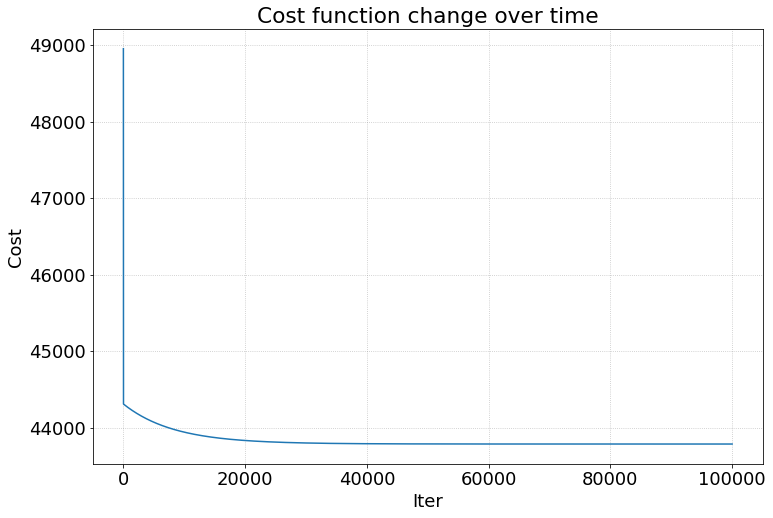

In [340]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.set_title('Cost function change over time')
ax.set_xlabel('Iter')
ax.set_ylabel('Cost')

ax.plot(cost_hist)
ax.grid(color = 'grey', linestyle = 'dotted', alpha = 0.5)

In [342]:
# Fitting linreg equation
y_pred = np.dot(X, theta)

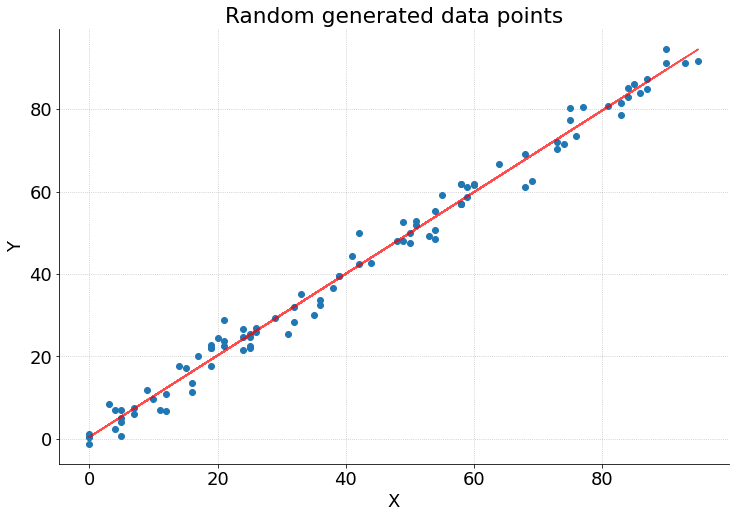

In [341]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.set_title("Random generated data points")
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(sample['x'], y)
ax.plot(sample['x'], y_pred, c='red', alpha = 0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color = 'grey', linestyle = 'dotted', alpha = 0.5)

In [343]:
from matplotlib.widgets import Slider, Button

<IPython.core.display.Javascript object>


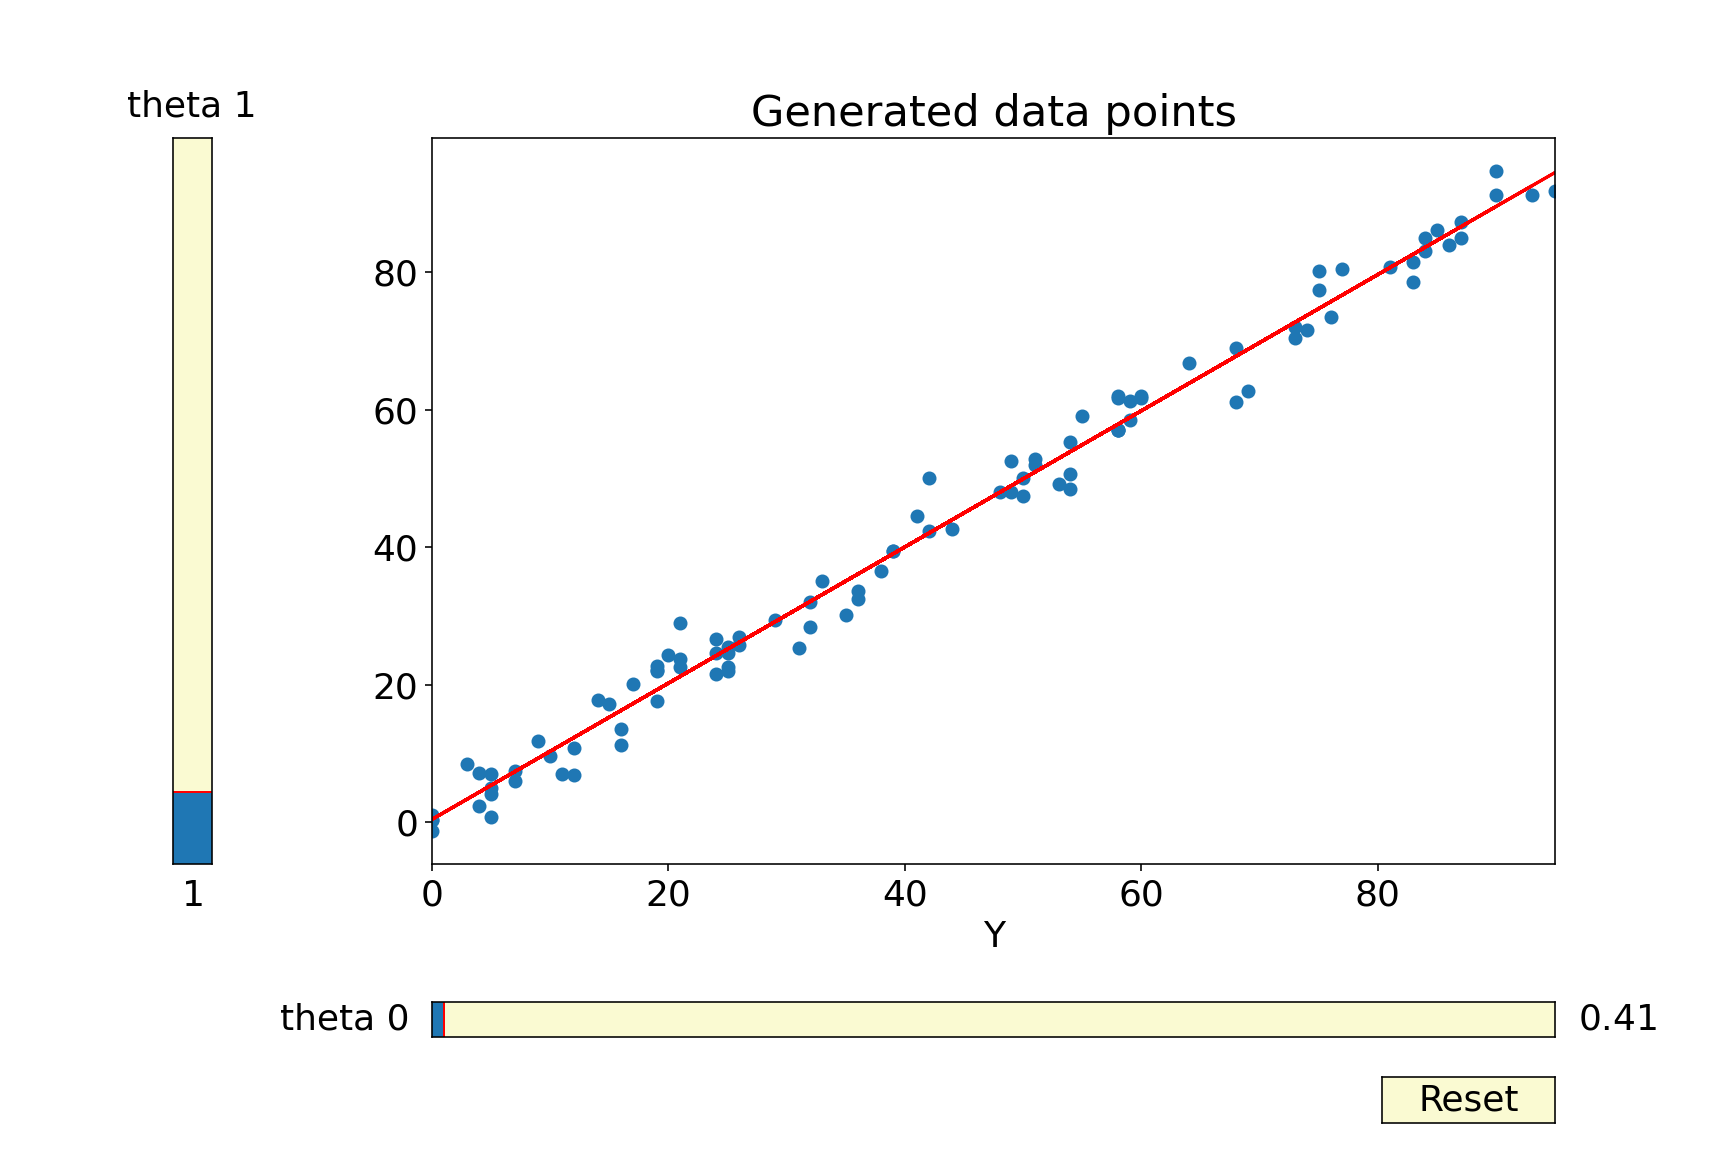

In [377]:
theta_0 = theta[0]
theta_1 = theta[1]


# The parametrized function to be plotted
def f(theta_0, theta_1):
    t = np.array([theta_0, theta_1])
    pred_val = np.dot(X, t)

    return pred_val

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(sample['x'], y)
line, = plt.plot(sample['x'], f(theta_0, theta_1), c = 'red')
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_title('Generated data points')

axcolor = 'lightgoldenrodyellow'
ax.margins(x = 0)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left = 0.25, bottom = 0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor = axcolor)
theta_0_slider = Slider(
    ax = axfreq,
    label = 'theta 0',
    valmin = 0.1,
    valmax = 30,
    valinit = theta_0,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor = axcolor)
theta_1_slider = Slider(
    ax = axamp,
    label = "theta 1",
    valmin = 0,
    valmax = 10,
    valinit = theta_1,
    orientation = "vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(theta_0_slider.val, theta_1_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
theta_0_slider.on_changed(update)
theta_1_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color = axcolor, hovercolor = '0.975')


def reset(event):
    theta_0_slider.reset()
    theta_1_slider.reset()
    
button.on_clicked(reset)
plt.show()